# **Libraries principais**



In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from tqdm import tqdm

# **Dataset**


In [2]:
# Fonte dos dados:  https://www.kaggle.com/datasets/shwetabh123/mall-customers
df = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Fazendo feature encoding
df1 = pd.get_dummies(df, columns=['Genre'], prefix=['Genre'])

In [5]:
df1.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False


In [6]:
#verificando se não há celulas vazias
df1.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Genre_Female              0
Genre_Male                0
dtype: int64

In [7]:
df1 = df1.drop(['CustomerID'], axis= 1)

##split data

In [8]:
# Dividindo o DataFrame em treinamento (70%) e teste (30%)
train_data, test_data = train_test_split(df1, test_size=0.3, random_state=42)

# Dividindo o conjunto de treinamento em teste (50%) e validação (50%) = 15/15
test_data, validation_data = train_test_split(test_data, test_size=0.5, random_state=42)

In [9]:
#checkando divisão
Ctotal = df1['Age'].count()
Ctrain = train_data['Age'].count()
Ctest = test_data['Age'].count()
Cvalid = validation_data['Age'].count()

print (Ctrain/Ctotal)
print (Ctest/Ctotal)
print (Cvalid/Ctotal)

0.7
0.15
0.15


##Remoção de outliers por IQR

In [10]:
# Select only numeric columns
numeric_train_data = train_data.select_dtypes(include='number')

# Calculate the first quartile (Q1)
q1 = numeric_train_data.quantile(0.25)

# Calculate the third quartile (Q3)
q3 = numeric_train_data.quantile(0.75)

# Calcule o IQR (Intervalo Interquartil)
iqr = q3 - q1

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

Q1: Age                       28.75
Annual Income (k$)        39.75
Spending Score (1-100)    35.75
Name: 0.25, dtype: float64
Q3: Age                       48.25
Annual Income (k$)        78.00
Spending Score (1-100)    73.00
Name: 0.75, dtype: float64
IQR: Age                       19.50
Annual Income (k$)        38.25
Spending Score (1-100)    37.25
dtype: float64


In [11]:
c = 1.5   #constante
LI = q1 - c*iqr   #limite inferior
LS = q3 + c*iqr   #limite superior

print(f"LI: {LI}")
print(f"LS: {LS}")

LI: Age                       -0.500
Annual Income (k$)       -17.625
Spending Score (1-100)   -20.125
dtype: float64
LS: Age                        77.500
Annual Income (k$)        135.375
Spending Score (1-100)    128.875
dtype: float64


In [12]:
# Fazer remoção de outlier por coluna
trainlimpo = train_data[(train_data['Age'] >= LI['Age']) & (train_data['Age'] <= LS['Age'])]
print(trainlimpo.shape)
trainlimpo = trainlimpo[(trainlimpo['Annual Income (k$)'] >= LI['Annual Income (k$)']) & (trainlimpo['Annual Income (k$)'] <= LS['Annual Income (k$)'])]
print(trainlimpo.shape)
trainlimpo = trainlimpo[(trainlimpo['Spending Score (1-100)'] >= LI['Spending Score (1-100)']) & (trainlimpo['Spending Score (1-100)'] <= LS['Spending Score (1-100)'])]
print(trainlimpo.shape)

(140, 5)
(138, 5)
(138, 5)


## Normalizando os dados


In [13]:
medtrain = trainlimpo.mean()
stdtrain = trainlimpo.std()
Ctreino = (trainlimpo - medtrain)/ stdtrain

In [14]:
Ctreino.head(2)

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
169,-0.480028,1.077249,0.443468,-1.103143,1.103143
97,-0.832015,0.031981,-0.052530,0.899932,-0.899932


- Tinha necessidade de normalizar os generos?
 - Não, mas fazer oque né.

In [15]:
#verificando se não há celulas vazias
trainlimpo.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Genre_Female              0
Genre_Male                0
dtype: int64

In [16]:
# Verificando desvio padrão normalizado =>>> Tem q ser igual ou proximo 1.
Ctreino.std()

Age                       1.0
Annual Income (k$)        1.0
Spending Score (1-100)    1.0
Genre_Female              1.0
Genre_Male                1.0
dtype: float64

In [17]:
#Media normalizada =>>>>>> Tem que ser igual a 0
round(Ctreino.mean(),7)

Age                      -0.0
Annual Income (k$)        0.0
Spending Score (1-100)   -0.0
Genre_Female              0.0
Genre_Male               -0.0
dtype: float64

In [18]:
Cvad = (validation_data - medtrain)/ stdtrain
Ctest = (test_data - medtrain)/ stdtrain

In [19]:
Ctreino.head(2)

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
169,-0.480028,1.077249,0.443468,-1.103143,1.103143
97,-0.832015,0.031981,-0.052530,0.899932,-0.899932


In [20]:
Cvad.head(2)

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
95,-1.043207,0.031981,0.023777,-1.103143,1.103143
115,-1.395193,0.225549,-0.052530,0.899932,-0.899932


###Grupo Para testar novos inputs

In [21]:
pessoasnovas = {
    'Genre': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Age': [25, 30, 35, 28, 40],
    'Annual Income (k$)': [50, 60, 45, 70, 80],
    'Spending Score (1-100)': [70, 50, 75, 60, 45],
    }

pessoasnovas = pd.DataFrame(pessoasnovas)
pessoasnovas = pd.get_dummies(pessoasnovas, columns=['Genre'], prefix=['Genre'])

# **Clusterização**

### Melhores metricas

In [22]:
from sklearn.cluster import KMeans
def treinakmeans(k,Ctreino):
    best = None
    bestin = np.Inf
    for _ in range(0,10):
        kmeans = KMeans(n_clusters=k, n_init=10)  #n_init é o numero de vezes que vai correr com numero do centroid diferentes
        kmeans.fit(Ctreino)
        inertia = kmeans.inertia_
        if inertia < bestin:
            best = kmeans
            bestin = inertia
    return best, bestin

In [23]:
# Crie uma lista para armazenar os valores de inércia
inertia = []
siluetas = []
n = 11

# Execute o K-Means para diferentes valores de k
for k in tqdm(range(2, n)):  # Teste valores de k de 1 a 10 (você pode ajustar o intervalo)
    kmeans,IN = treinakmeans(k,Ctreino)
    inertia.append(IN)
    labels= kmeans.predict(Cvad)
    silhouette_avg = silhouette_score(Cvad, labels)
    siluetas.append(silhouette_avg)

100%|██████████| 9/9 [00:04<00:00,  2.02it/s]


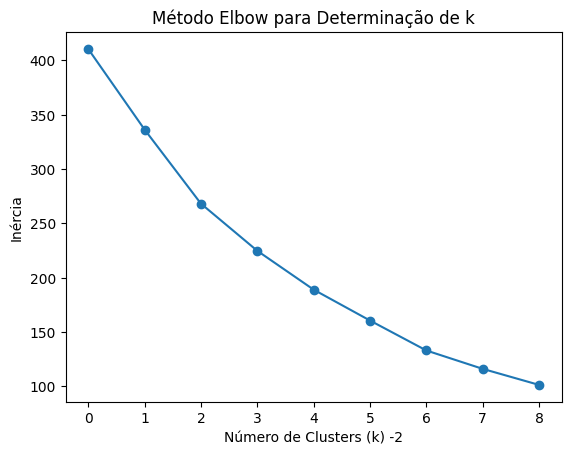

In [24]:
# Crie um gráfico do Elbow Point
plt.plot(inertia, marker='o')
plt.xticks(range(len(inertia)),range(len(inertia)) )
plt.xlabel('Número de Clusters (k) -2')
plt.ylabel('Inércia')
plt.title('Método Elbow para Determinação de k')
plt.show()

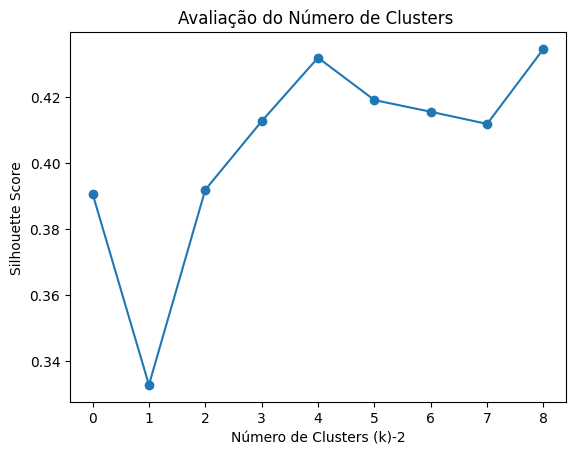

In [25]:
    # Trace o gráfico da silhueta
plt.plot(siluetas, marker='o')
plt.xlabel('Número de Clusters (k)-2')
plt.xticks(range(len(siluetas)),range(len(siluetas)) )
plt.ylabel('Silhouette Score')
plt.title('Avaliação do Número de Clusters ')
plt.show()

### Clusterizando

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, n_init=10)
kmeans_model = kmeans.fit(Ctreino)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

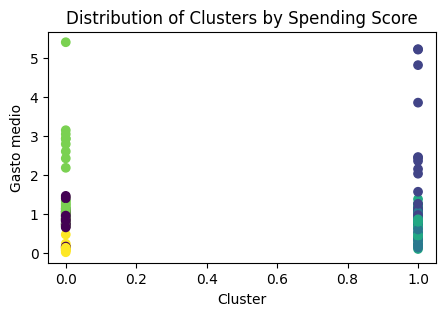

In [27]:
# Adicione os rótulos dos clusters ao DataFrame
Ctreino2 = trainlimpo.copy()
Ctreino2['Cluster'] = kmeans.labels_
Ctreino2['Gasto'] = Ctreino2['Spending Score (1-100)']/Ctreino2['Annual Income (k$)']

# Criar o gráfico de dispersão
plt.figure(figsize=(5, 3))

# Plotar os pontos para o cluster atual com cor diferente
plt.scatter(Ctreino2['Genre_Female'], Ctreino2['Gasto'],c=Ctreino2['Cluster'] )

plt.ylabel('Gasto medio')
plt.xlabel('Cluster')
plt.title('Distribution of Clusters by Spending Score')
plt.show()


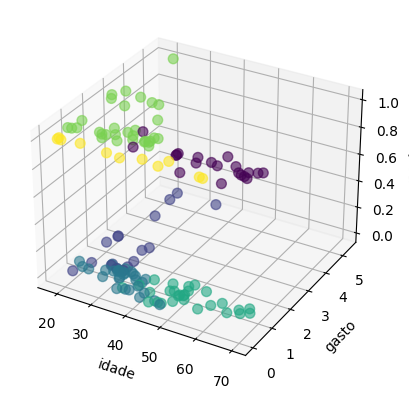

In [28]:
# Plote os resultados em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Atribua as colunas aos eixos x, y e z
ax.scatter(Ctreino2['Age'], Ctreino2['Gasto'], Ctreino2['Genre_Male'], c=Ctreino2['Cluster'], cmap='viridis', s=50, alpha=0.6)

# Rotule os eixos
ax.set_xlabel('idade')
ax.set_ylabel('gasto')
ax.set_zlabel('receita')

plt.show()

In [29]:
#Aplicando a clusterização aos grupos de validação e teste
labels_validacao = kmeans.predict(Cvad)
labels_teste = kmeans.predict(Ctest)

In [30]:
Cvad['Cluster'] = labels_validacao
validation_data['Cluster'] = labels_validacao
Ctest['Cluster'] = labels_teste

In [31]:
# Pontuação de silhueta quanto mais proximo de 1 melhor
silhouette_score_validacao = silhouette_score(Cvad, labels_validacao)
print("Pontuação de silhueta do conjunto de validação:", silhouette_score_validacao)

# Pontuação Calinski-Harabasz quanto maior melhor.
calinski_harabasz_score_validacao = calinski_harabasz_score(Cvad, labels_validacao)
print("Pontuação Calinski-Harabasz do conjunto de validação:", calinski_harabasz_score_validacao)

Pontuação de silhueta do conjunto de validação: 0.4981965138988928
Pontuação Calinski-Harabasz do conjunto de validação: 32.0562552554675


### grupos encontrados

- Grupos 0 e 5 gasta muito
- Grupo 2 e 1 gasta pouco
- Grupo 4 e 3 gasta medio
- Impar mulher /  Par homem

### Testando clusterização com novas inserções

In [32]:
def clusterizar(data,medtrain,stdtrain,kmeans):
  df1 = data
  df1 = (df1 - medtrain)/ stdtrain
  labels = kmeans.predict(df1)
  print(labels)
  return labels

In [33]:
pessoasnovas

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,25,50,70,False,True
1,30,60,50,True,False
2,35,45,75,False,True
3,28,70,60,True,False
4,40,80,45,False,True


In [34]:
labels = []
for index, row in pessoasnovas.iterrows():
  labels.append(clusterizar(pessoasnovas.iloc[[index]],medtrain,stdtrain,kmeans)[0])

pessoasnovas2 = pessoasnovas.copy()
pessoasnovas2['Cluster'] = labels

[4]
[2]
[4]
[2]
[5]


In [35]:
pessoasnovas2

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,Cluster
0,25,50,70,False,True,4
1,30,60,50,True,False,2
2,35,45,75,False,True,4
3,28,70,60,True,False,2
4,40,80,45,False,True,5
